# UNGDC
## Country Profiles 
### Unstructured Data Analytics, Spring 2020 <br>

Laura Goyeneche  <br>
Lindsay Graff    <br>
Jana Macickova   <br>
Ashita Vadlamudi <br>

Heinz College of Information Systems and Public Policy <br>
Carnegie Mellon University

In [9]:
# Libraries 
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

import wordcloud
from wordcloud import WordCloud

from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabaz_score

%matplotlib inline
plt.style.use('seaborn')

In [3]:
# Import dataset 
df = pd.read_csv('final_df.csv', sep = ',', header = 0)
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
# Features generation
df['decade'] = np.where((df.year < 1980), '70s', 
                        np.where((df.year >=1980) & (df.year < 1990), '80s',
                                 np.where((df.year >= 1990) & (df.year < 2000), '90s',
                                          np.where((df.year>=2000) & (df.year < 2010), '00s',
                                                  '10s'))))

In [180]:
#total_yrs = 2016-1970+1
#df_country = df.groupby(['country_name'])['countryID'].count().reset_index()
#df_country['partic_pct'] = df_country['countryID']/total_yrs
#df_country_50 = df_country[df_country['partic_pct'] < .50]
#names = list(df_country_50['country_name'].unique())
#temp = df[df['country_name'].isin(names)]
#temp.groupby('countryID').first().shape
#temp

,year,countryID,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)","Annualized average growth rate in per capita real survey mean consumption or income, total population (%)",...,region,statement,speaker,speaker_post,income_level,language,decade,high_topic,high_topic_name,cut
3014,1992,GEO,NaN,NaN,NaN,NaN,46.467118,52.345844,NaN,NaN,...,Europe & Central Asia,One does not \nusually say anything personal f...,SHEVARDNADZE,Chairman,Upper middle income,Russian,90s,0,UN Mission,"(3.0, 7.416]"
3101,1992,SVN,NaN,100.000000,NaN,NaN,28.003972,NaN,NaN,NaN,...,Europe & Central Asia,"Allow me to congratulate you. Sir, and the fri...",Kucan,President,High income,Slovenian,90s,8,Nuclear Disarmament,"(3.0, 7.416]"
3116,1992,UZB,NaN,NaN,NaN,NaN,65.171603,35.139185,NaN,NaN,...,Europe & Central Asia,Let me \nmost cordially join in congratulating...,Mr. ABDURAZZAKOV,NaN,Lower middle income,Russian,90s,3,Latin American Governance,"(3.0, 7.416]"
3164,1993,CZE,NaN,100.000000,0.118397,0.000000,55.416074,4.178427,NaN,NaN,...,Europe & Central Asia,"Mr. President, let\nme start by congratulating...",Mr. ZIELENIEC,NaN,High income,NaN,90s,8,Nuclear Disarmament,"(7.416, 87.687]"
3173,1993,ERI,NaN,NaN,5.282108,5.282108,73.267327,19.435134,NaN,NaN,...,Sub-Saharan Africa,"Let me begin by congratulating\nyou, Sir, upon...",MR. ISAIAS AFWERKI,President,Low income,NaN,90s,0,UN Mission,NaN
3226,1993,MCO,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,Europe & Central Asia,"For me this is a very special occasion, for it...",Prince Albert,CROWN PRINCE,High income,French,90s,2,International Cooperation,NaN
3231,1993,MKD,NaN,100.000000,0.118738,0.000000,51.002753,10.023398,NaN,NaN,...,Europe & Central Asia,"At the outset, it is my pleasure\nto extend to...",MR. KIRO GLIGOROV,President,Upper middle income,Macedonian,90s,8,Nuclear Disarmament,"(3.0, 7.416]"
3272,1993,SVK,NaN,100.000000,NaN,NaN,50.852391,NaN,NaN,NaN,...,Europe & Central Asia,I wish to convey my\ncongratulations to Ambass...,Mr. MORAVCK,NaN,High income,NaN,90s,8,Nuclear Disarmament,"(7.416, 87.687]"
3273,1993,SVN,NaN,100.000000,NaN,NaN,27.805362,NaN,NaN,NaN,...,Europe & Central Asia,"Allow me, Sir, to offer\nyou, and the Republic...",MR. JANEZ DRNOVSEK,PRIME MINISTER,High income,NaN,90s,8,Nuclear Disarmament,"(3.0, 7.416]"
3282,1993,TKM,NaN,NaN,NaN,NaN,75.436767,18.163673,NaN,NaN,...,Europe & Central Asia,"First of all, I should like to congratulate th...",Mr. SHIHMURADOV,NaN,Upper middle income,Russian,90s,2,International Cooperation,"(3.0, 7.416]"


In [67]:
# Select top words 
ntop         = 20
topic_word20 = Counter()

for i in range(ntopics):
    sort_idx = np.argsort(-topic_word[i])
    top_word = []
    
    for j in range(ntop):
        word_idx = sort_idx[j]
        top_word.append([tfVector.get_feature_names()[word_idx], topic_word[i, word_idx]])
    
    topic_word20[i] = top_word

## 1. Sentiment Analysis

### 2. Topic Modeling

### 2.1. Analysis from 1987-2016

In [10]:
# Define TD-IDF matrix
tfVector = CountVectorizer(max_df = 0.90, min_df = 750, stop_words = 'english', max_features = 500)
tf       = tfVector.fit_transform(df.statement)

In [33]:
# Model Latent Dirichlet Allocation
ntopics = 10
lda     = LatentDirichletAllocation(n_components = ntopics, max_iter = 10, n_jobs = -1, learning_method = 'online', random_state = 0)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [34]:
# Create topic-word distributions
topic_word   = np.array([row/row.sum() for row in lda.components_])

In [67]:
# Select top words 
ntop         = 20
topic_word20 = Counter()

for i in range(ntopics):
    sort_idx = np.argsort(-topic_word[i])
    top_word = []
    
    for j in range(ntop):
        word_idx = sort_idx[j]
        top_word.append([tfVector.get_feature_names()[word_idx], topic_word[i, word_idx]])
    
    topic_word20[i] = top_word

In [36]:
# Define topic name 
topic_name = ['UN Mission','African Development','International Cooperation','Latin American Governance','Middle East Conflict','Military Power','Israel-Palestine Conflict','Climate Change','Nuclear Disarmament','Advancement']

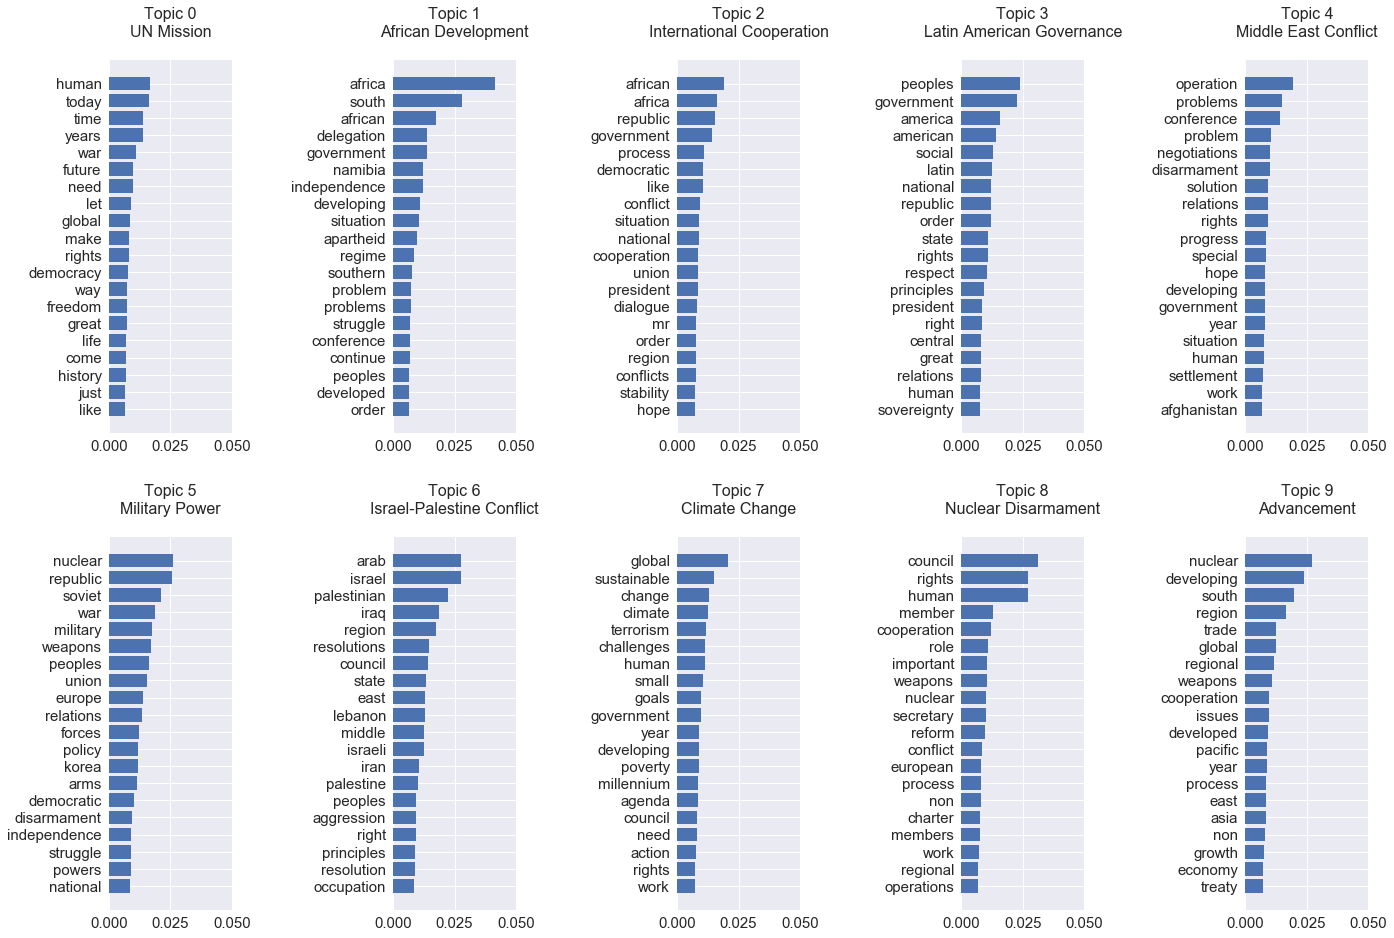

In [41]:
# Top 10 words across 10 topics
plt.figure(figsize = (20,20))

for i in topic_word20.keys():
    
    name = [j[0] for j in topic_word20[i]][:20]
    val  = [j[1] for j in topic_word20[i]][:20]
    #print(name,val)
    y_pos = np.arange(len(name))
    
    plt.subplot(3,5,i+1)
    plt.barh(y_pos,val)
    plt.xlim(0,0.050)

    # Create names on the y-axis
    plt.yticks(y_pos, name)
    plt.tight_layout(pad = 3.0)
    
    #plt.xticks(rotation = 90)
    plt.title('Topic ' + str(i) + '\n' + topic_name[i] + '\n', fontsize = 16)
    plt.tick_params(labelsize = 15)
    plt.gca().invert_yaxis()
    #plt.figure()
    
plt.show()

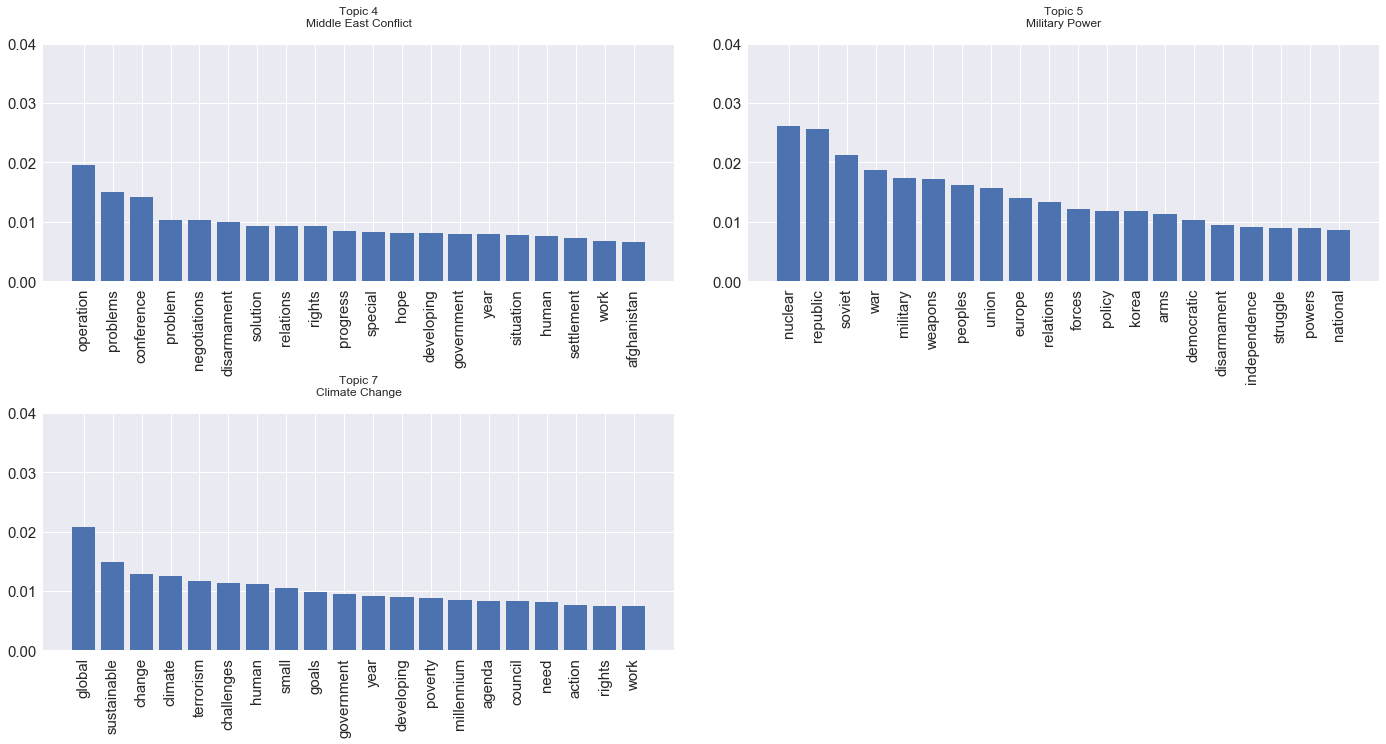

In [45]:
# Top 10 words in selected topics
plt.figure(figsize = (20,10))
topic_sel = [4,5,7]
for i in range(len(topic_sel)):
    
    name = [j[0] for j in topic_word20[topic_sel[i]]][:20]
    val  = [j[1] for j in topic_word20[topic_sel[i]]][:20]
    
    plt.subplot(2,2,i+1)
    plt.bar(name,val)
    plt.ylim(0,0.040)
    plt.tight_layout(pad = 3.0)
    plt.xticks(rotation = 90)
    plt.title('Topic ' + str(topic_sel[i]) + '\n' + topic_name[topic_sel[i]] + '\n')
    plt.tick_params(labelsize = 15)
    
plt.show()

In [46]:
# Calculate for each statement the fraction explained by each topic
ldahat = lda.transform(tf)

In [47]:
# Select the topic with highest proportion by statements
high_topic = [i[0] for i in np.argsort(-ldahat)]

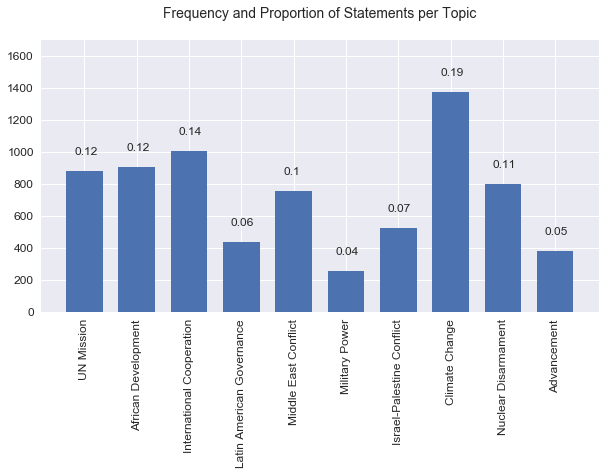

In [127]:
# Number of statements per topic
temp = np.unique(high_topic, return_counts = True)

plt.figure(figsize = (10,5))
plt.bar(temp[0], temp[1], width = 0.7)
for i in range(10): plt.text(temp[0][i] - 0.2, temp[1][i] + 100, round(temp[1][i]/temp[1].sum(),2), size = 12)
plt.title('Frequency and Proportion of Statements per Topic\n', fontsize = 14)
plt.xticks(range(10), topic_name, rotation = 90)
plt.tick_params(labelsize = 12)
plt.ylim(0,1700)
plt.show()

In [49]:
%%capture

# Add features to datatable
df['high_topic']      = high_topic
df['high_topic_name'] = ''
for i in range(len(topic_name)): df.high_topic_name[df.high_topic == i] = topic_name[i]

In [50]:
# Export data to .csv format 
df.to_csv('final_df2.csv')

### 2.2. Analysis by decades
*Includes analysis by region, income level and WB's indicators for the dominant topic in each statement*

#### 2.2.1. General

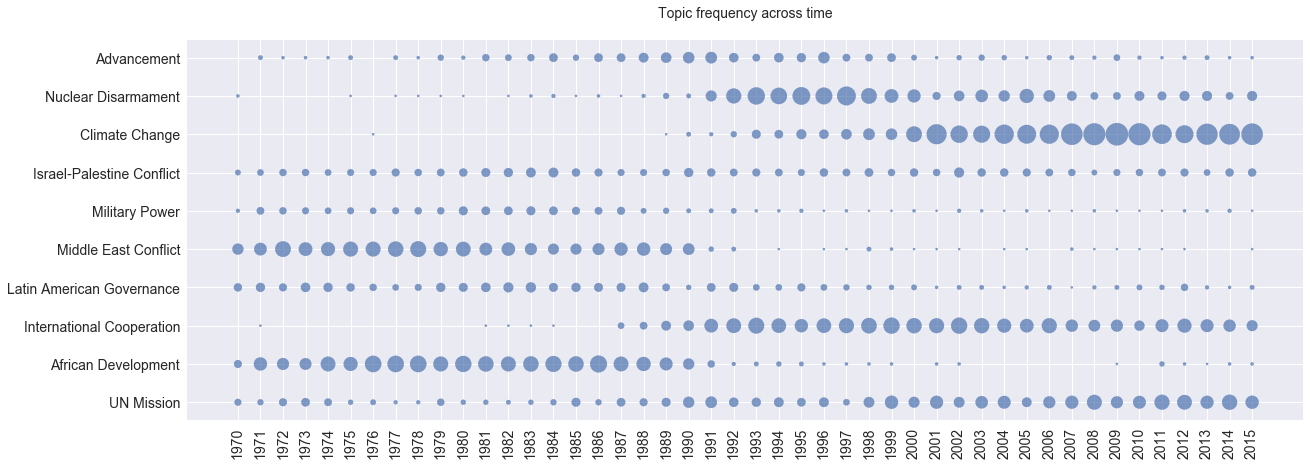

In [52]:
temp = df.groupby(['year','high_topic'])['countryID'].count().reset_index()

plt.figure(figsize = (20,7))
plt.scatter(temp.year, temp.high_topic, s = temp.countryID*5, alpha = 0.7)
plt.title('Topic frequency across time\n', fontsize = 14)
plt.xticks(range(1970,2016), rotation = 90)
plt.yticks(range(10), topic_name)
plt.tick_params(labelsize = 14)
plt.show()

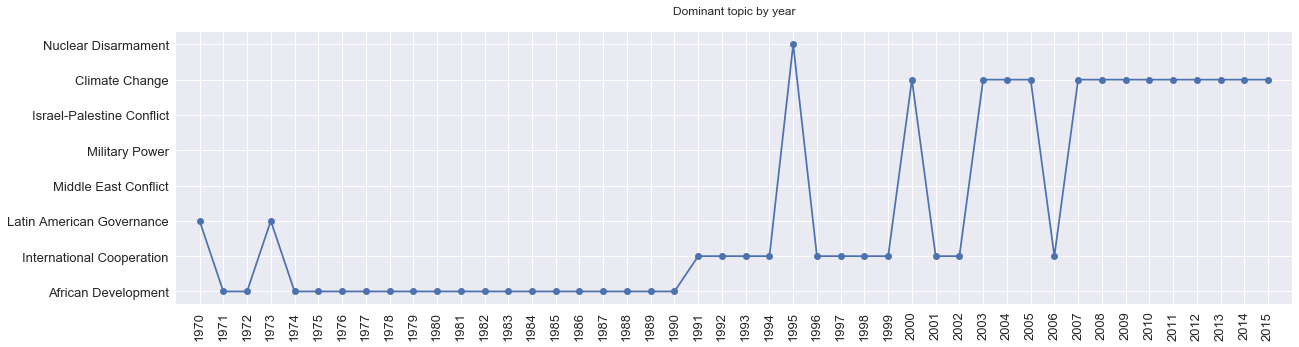

In [208]:
temp = df.groupby(['year','high_topic'])['countryID'].count().reset_index()
temp = temp.sort_values(['year','countryID'],ascending = False).drop_duplicates(subset = 'year')

plt.figure(figsize = (20,5))
plt.plot(temp.year, temp.high_topic, '-o')
plt.title('Dominant topic by year\n')
plt.xticks(range(1970,2016), rotation = 90)
plt.yticks(range(1,9), topic_name[1:10]) 
plt.tick_params(labelsize = 13)
plt.xlim(1969,2016)
plt.show()

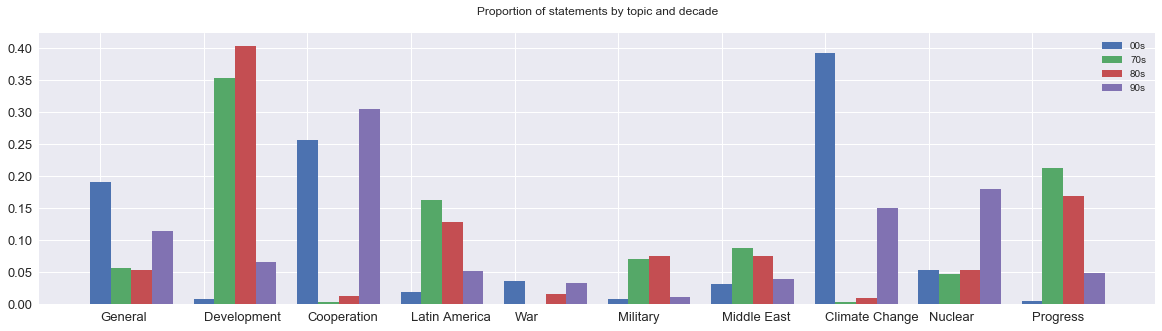

In [17]:
plt.figure(figsize = (20,5))

for i,j in enumerate(np.unique(df.decade)):
    temp = np.unique(df.high_topic[df.decade == j], return_counts = True)
    plt.bar(temp[0]+i*0.2, temp[1]/temp[1].sum(), label = j, width = 0.2)

plt.title('Proportion of statements by topic and decade\n')
plt.legend()
plt.xticks(range(10), topic_name, horizontalalignment = 'left')
plt.tick_params(labelsize = 13)
plt.show()

#### 2.2.2. Region

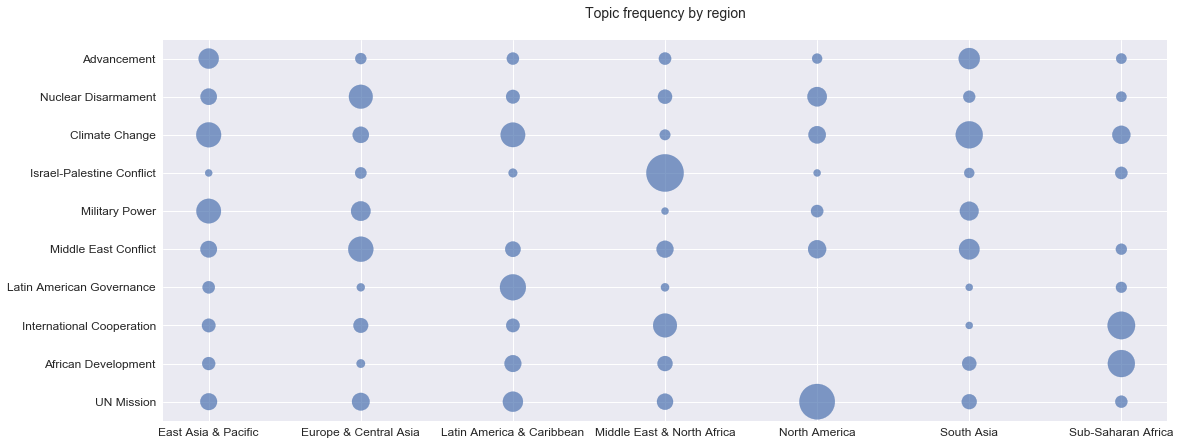

In [57]:
temp = df.groupby(['region','high_topic'])['countryID'].count().reset_index()
temp['unique'] = df.groupby(['region','high_topic'])['countryID'].nunique().reset_index()['countryID']
temp['prop']   = temp.countryID/temp.unique

plt.figure(figsize = (18,7))
plt.scatter(temp.region, temp.high_topic, s = temp.prop*50, alpha = 0.7)
plt.title('Topic frequency by region\n', fontsize = 14)
plt.yticks(range(10), topic_name)
plt.tick_params(labelsize = 12)
plt.show()

#### 2.2.3. Income Level

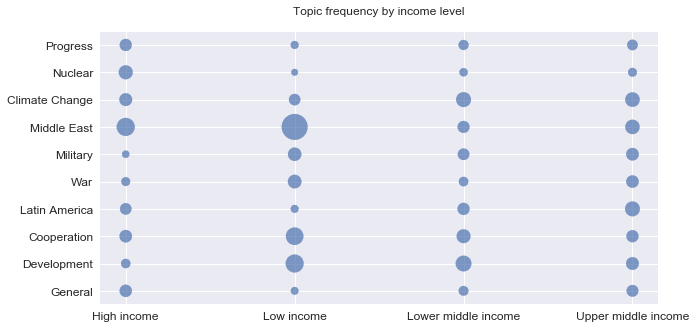

In [19]:
temp = df.groupby(['income_level','high_topic'])['countryID'].count().reset_index()
temp['unique'] = df.groupby(['income_level','high_topic'])['countryID'].nunique().reset_index()['countryID']
temp['prop']   = temp.countryID/temp.unique

plt.figure(figsize = (10,5))
plt.scatter(temp.income_level, temp.high_topic, s = temp.prop*20, alpha = 0.7)
plt.title('Topic frequency by income level\n')
plt.yticks(range(10), topic_name)
plt.tick_params(labelsize = 12)
plt.show()

#### 2.2.4. WB: CO2 emissions

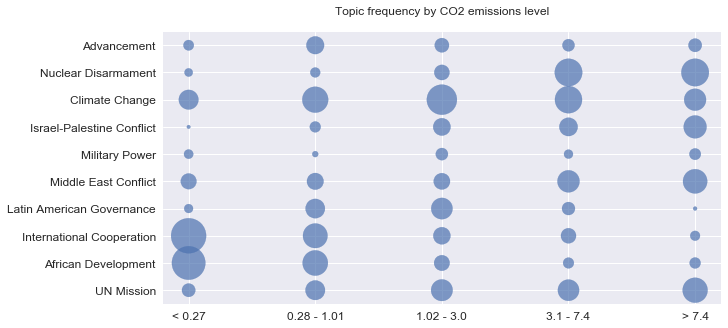

In [58]:
df['cut']      = pd.qcut(df['CO2 emissions (metric tons per capita)'], 5)
temp           = df.groupby(['cut','high_topic'])['countryID'].count().reset_index()
temp['unique'] = df.groupby(['cut','high_topic'])['countryID'].nunique().reset_index()['countryID']
temp['prop']   = temp.countryID/temp.unique
temp.cut       = temp.cut.apply(lambda x: str(x))

plt.figure(figsize = (10,5))
plt.scatter(temp.cut, temp.high_topic, s = temp.countryID*2.5, alpha = 0.7)
plt.title('Topic frequency by CO2 emissions level\n')
plt.xticks(range(5), ['< 0.27','0.28 - 1.01','1.02 - 3.0','3.1 - 7.4','> 7.4'])
plt.yticks(range(10), topic_name)
plt.tick_params(labelsize = 12)
plt.show()

In [126]:
# 3 top emitters by category
df_co2 = df[['country_name', 'year', 'CO2 emissions (metric tons per capita)', 'cut']]
idx0 = df_co2['CO2 emissions (metric tons per capita)'] < .27
idx1 = (df_co2['CO2 emissions (metric tons per capita)'] >= .28) & (df_co2['CO2 emissions (metric tons per capita)'] <= 1.01)
idx2 = (df_co2['CO2 emissions (metric tons per capita)'] > 1.01) & (df_co2['CO2 emissions (metric tons per capita)'] <= 3.0)
idx3 = (df_co2['CO2 emissions (metric tons per capita)'] > 3) & (df_co2['CO2 emissions (metric tons per capita)'] <= 7.4)
idx4 = (df_co2['CO2 emissions (metric tons per capita)'] > 7.4) 

df_co2[idx0].nlargest(3, 'CO2 emissions (metric tons per capita)')
df_co2[idx1].nlargest(3, 'CO2 emissions (metric tons per capita)')
df_co2[idx2].nlargest(3, 'CO2 emissions (metric tons per capita)')
df_co2[idx3].nlargest(4, 'CO2 emissions (metric tons per capita)')    
df_co2[idx4].nlargest(3, 'CO2 emissions (metric tons per capita)')

,country_name,year,CO2 emissions (metric tons per capita),cut
394,Qatar,1973,87.686551,"(7.416, 87.687]"
275,Qatar,1972,82.640973,"(7.416, 87.687]"
305,United Arab Emirates,1973,77.619331,"(7.416, 87.687]"


#### 2.2.5. WB: Gini Index

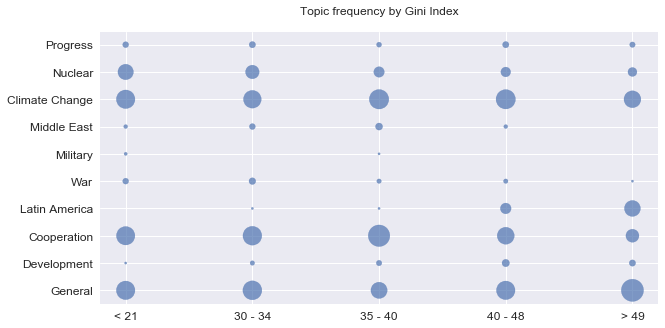

In [149]:
df['cut']      = pd.qcut(df['GINI index (World Bank estimate)'], 5)
temp           = df.groupby(['cut','high_topic'])['countryID'].count().reset_index()
temp['unique'] = df.groupby(['cut','high_topic'])['countryID'].nunique().reset_index()['countryID']
temp['prop']   = temp.countryID/temp.unique
temp.cut       = temp.cut.apply(lambda x: str(x))

plt.figure(figsize = (10,5))
plt.scatter(temp.cut, temp.high_topic, s = temp.countryID*5, alpha = 0.7)
plt.title('Topic frequency by Gini Index\n')
plt.xticks(range(5), ['< 21','30 - 34','35 - 40','40 - 48','> 49'])
plt.yticks(range(10), topic_name)
plt.tick_params(labelsize = 12)
plt.show()

### 2.3. Case studies
*Analysis for different type of countries: US, China, Iran/Irak/Afghanistan, Sudan/Rwanda*

#### 2.3.1. United States

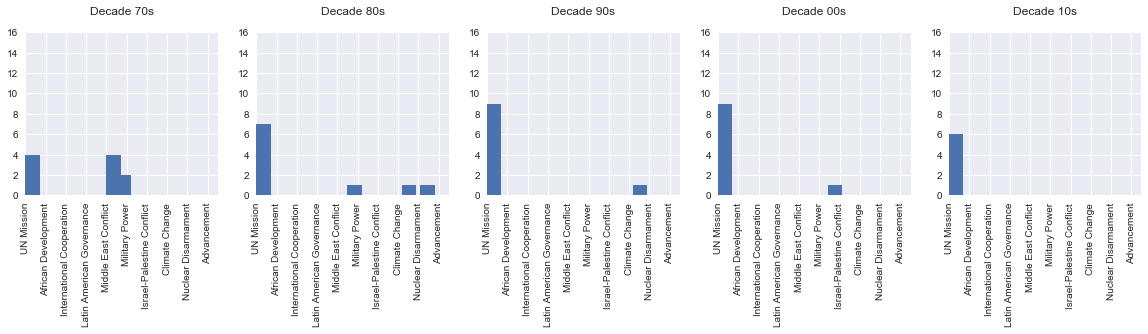

In [62]:
plt.figure(figsize = (20,3))
for i,j in enumerate(['70s','80s','90s','00s', '10s']):
    temp = df[(df.country_name == 'United States') & (df.decade == j)]['high_topic']
    
    plt.subplot(1,5,i+1)
    plt.hist(temp, width = 0.7)
    plt.title('Decade ' + str(j) + '\n')
    plt.ylim(0,16)
    plt.xlim(0,9.5)
    plt.xticks(range(10), topic_name, rotation = 90)

plt.show()

#### 2.3.2. China

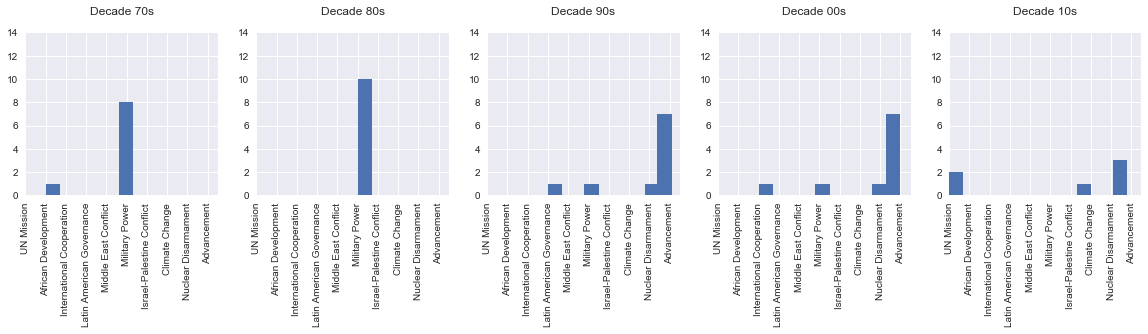

In [63]:
plt.figure(figsize = (20,3))
for i,j in enumerate(['70s','80s','90s','00s', '10s']):
    temp = df[(df.country_name == 'China') & (df.decade == j)]['high_topic']
    
    plt.subplot(1,5,i+1)
    plt.hist(temp, width = 0.7)
    plt.title('Decade ' + str(j) + '\n')
    plt.ylim(0,14)
    plt.xlim(0,9.5)
    plt.xticks(range(10), topic_name, rotation = 90)

plt.show()

#### 2.3.3. Iraq

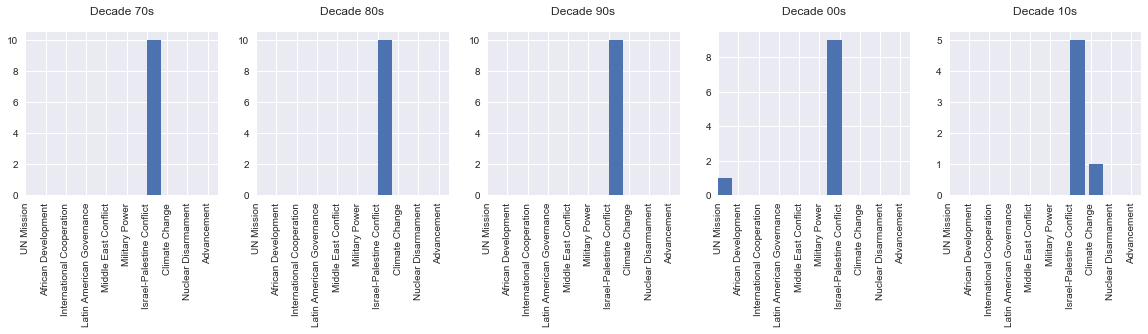

In [64]:
plt.figure(figsize = (20,3))
for i,j in enumerate(['70s','80s','90s','00s', '10s']):
    temp = df[(df.country_name == 'Iraq') & (df.decade == j)]['high_topic']
    
    plt.subplot(1,5,i+1)
    plt.hist(temp, width = 0.7)
    plt.title('Decade ' + str(j) + '\n')
    #plt.ylim(0,16)
    plt.xlim(0,9.5)
    plt.xticks(range(10), topic_name, rotation = 90)

plt.show()

#### 2.3.4. Sudan

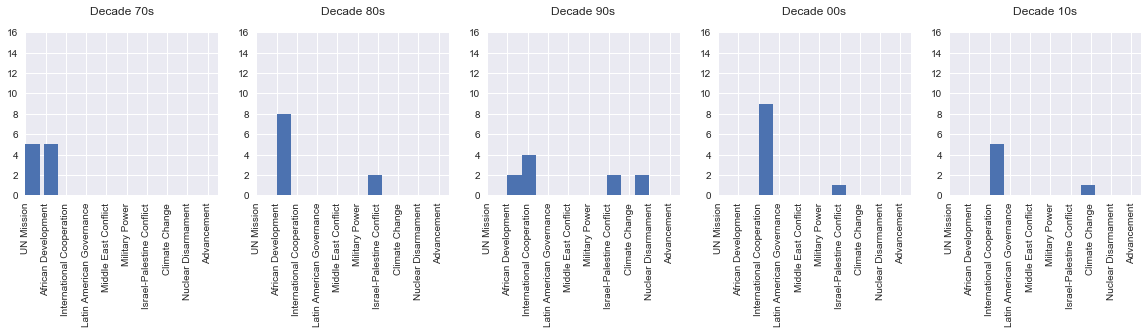

In [65]:
plt.figure(figsize = (20,3))
for i,j in enumerate(['70s','80s','90s','00s', '10s']):
    temp = df[(df.country_name == 'Sudan') & (df.decade == j)]['high_topic']
    
    plt.subplot(1,5,i+1)
    plt.hist(temp, width = 0.7)
    plt.title('Decade ' + str(j) + '\n')
    plt.ylim(0,16)
    plt.xlim(0,9.5)
    plt.xticks(range(10), topic_name, rotation = 90)

plt.show()

## 3. Clustering

### 3.1. Dimensionality reduction
*Clusters indicate groups of statements that have similar topics*

In [26]:
# Define t-SNE 
sample       = np.random.randint(ldahat.shape[0], size = 1000)
ldahatsample = ldahat[sample, :]

tsne   = TSNE(n_components = 2, random_state = 0, init = 'pca', learning_rate = 100, angle = 0.99) 
tsne2d = tsne.fit_transform(ldahatsample)

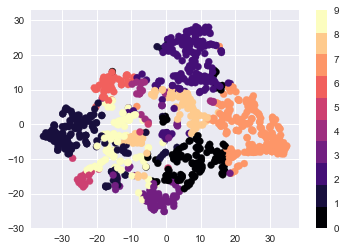

In [27]:
# Identifying structure in the reduced dimensional space
color = [np.where(i == max(i))[0][0] for i in ldahatsample]

plt.scatter(tsne2d[:, 0], tsne2d[:, 1], c = color, cmap = plt.cm.get_cmap('magma',10))
plt.colorbar(ticks = range(10))
plt.axis('equal')
plt.show()

### 3.2. Gaussian Mixture
*Find optimal number of clusters based on __Halinski Harabaz Metric__*

In [32]:
%%capture

best_score   = -np.inf
best_k       = None
best_model   = None
best_cluster = None
results      = Counter()

for k in range(2, 15):
    gmm = GaussianMixture(n_components = k, n_init = 100, random_state = 0)
    gmm.fit(tsne2d)
    
    cluster = gmm.predict(tsne2d)
    score   = calinski_harabaz_score(tsne2d, cluster)
    
    results[k] = round(score,2)
    
    if score > best_score:
        best_score   = score
        best_k       = k
        best_model   = gmm
        best_cluster = cluster

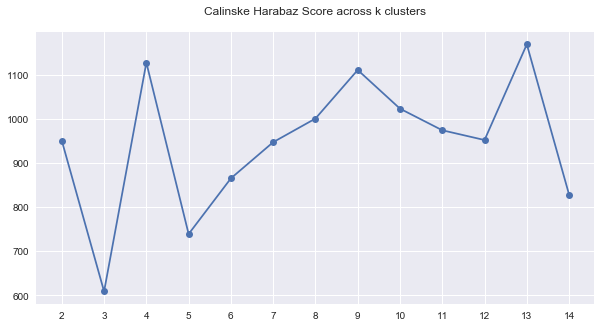

In [229]:
# Results across k 
plt.figure(figsize = (10,5))
plt.plot(results.keys(), results.values(), '-o')
plt.xticks(range(2,15))
plt.title('Calinske Harabaz Score across k clusters\n')
plt.show()

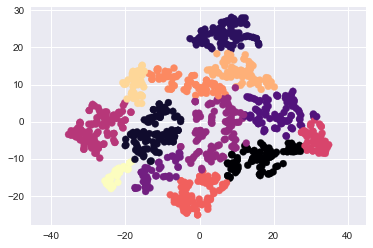

In [34]:
# Model with optimal number of clusters
gmm = GaussianMixture(n_components = best_k, n_init = 100, random_state = 0)
gmm.fit(tsne2d)
gmm_cluster = gmm.predict(tsne2d)

plt.scatter(tsne2d[:, 0], tsne2d[:, 1], c = gmm_cluster, cmap = 'magma')
plt.axis('equal')
plt.show()

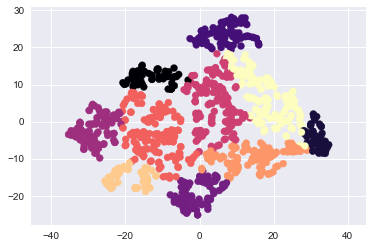

In [31]:
# Model with 10 clusters
gmm = GaussianMixture(n_components = 10, n_init = 100, random_state = 0)
gmm.fit(tsne2d)
gmm_cluster = gmm.predict(tsne2d)

plt.scatter(tsne2d[:, 0], tsne2d[:, 1], c = gmm_cluster, cmap = 'magma')
plt.axis('equal')
plt.show()